In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
X = pd.read_csv('./Data/Linear_X_Train.csv').values
y = pd.read_csv('./Data/Linear_Y_Train.csv').values.reshape(-1)
print(X.shape,y.shape)

(3750, 1) (3750,)


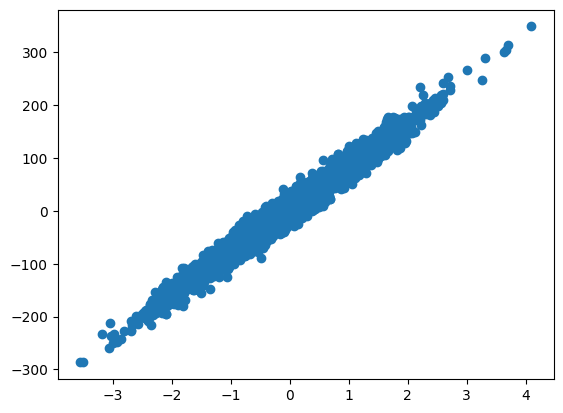

In [3]:
plt.scatter(X,y)
plt.show()

In [13]:
def hypothesis(x,w,w0):
    # yp = []
    # for i in range(x.shape[0]):
    #     y = w0 + np.sum(w*x[i])
    #     # for j in range(x.shape[1]):
    #     #     y += w[j]*x[i,j]
    #     yp.append(y)
    # return yp

    # return np.sum(w*x,axis = 1)+w0\
    return w@x.T+w0

In [14]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],0)

array([ 4,  7, 10, 13])

In [17]:
w = [2]
w0 = 1

In [18]:
def loss(x,w,w0,y):
    ypred = hypothesis(x,w,w0)
    return np.mean((ypred-y)**2)

In [19]:
loss(X,w,w0,y)

6262.785551671269

In [26]:
def gradientDescent(X,y,lr = 0.01,epochs = 100):
    w = np.zeros(shape=(X.shape[1],))
    w0 = 1
    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        # for j in range(X.shape[1]):
        #     grad.append((yp-y)@X[:,j]/X.shape[0])

        grads = np.mean((ypred-y)*X.T,axis =1)
        w = w - lr*grads
        w0 = w0 - lr*np.mean(ypred-y)
    return w,w0

In [27]:
w,w0 = gradientDescent(X,y,lr = 0.05,epochs=10000)

In [28]:
w

array([80.54363185])

In [29]:
w0

3.727988284452725

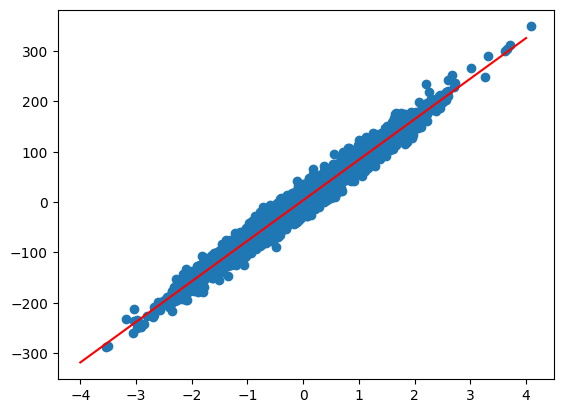

In [30]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [66]:
class LinearRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return np.mean((ypred-y)**2)

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w[0] = 77
        w0 = -3
        self.loss_e = [self.loss(X,w,w0,y)]
        self.th1 = [w[0]]
        self.th0 = [w0]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            i = np.random.randint(X.shape[0])
            # grads = np.mean((ypred-y)*X.T,axis =1)
            grads = (ypred[i]-y[i])*X[i]
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)
           
            self.th1.append(w[0])
            self.th0.append(w0)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [67]:
clf = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [68]:
clf.fit(x_train,y_train,epochs=10000)

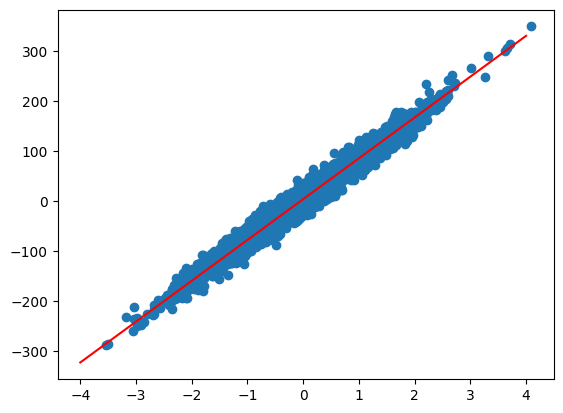

In [69]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,clf.predict(x),c='r')
plt.show()

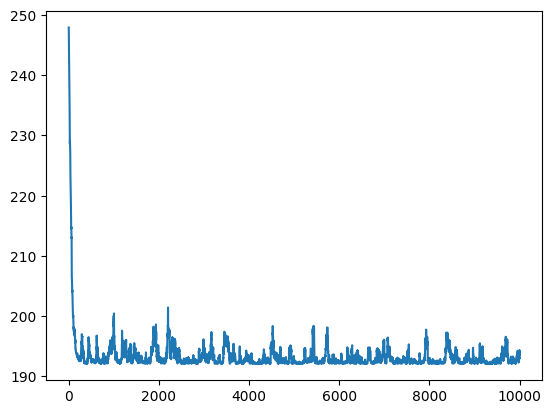

In [70]:
plt.plot(clf.loss_e)
plt.show()

In [71]:
r2_score(y_test,clf.predict(x_test))

0.9704421421646653

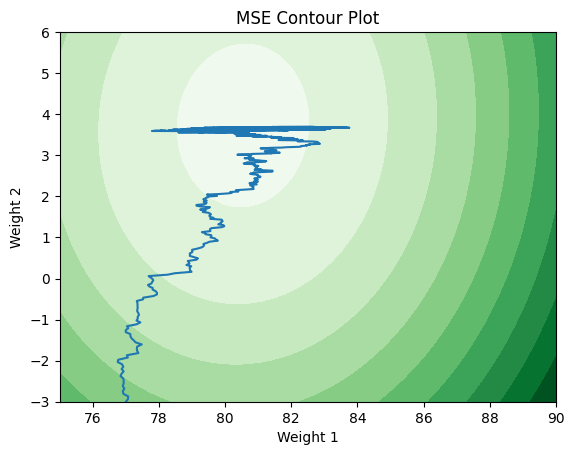

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume you have your data (X, y) and a trained linear regression model with weights 'w1' and 'w2' 
Xs = np.column_stack((X,np.ones_like(X)))
# Generate a grid of possible weights
w1_range = np.linspace(75, 90, 50)
w2_range = np.linspace(-3, 6, 50)
w1_grid, w2_grid = np.meshgrid(w1_range, w2_range)

# Calculate MSE for each weight combination
mse_grid = np.zeros_like(w1_grid)
for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        w1_test, w2_test = w1_grid[i, j], w2_grid[i, j]
        predicted = np.dot(Xs, [w1_test, w2_test])
        mse_grid[i, j] = mean_squared_error(y, predicted) 

# Create contour plot
plt.contourf(w1_grid, w2_grid, mse_grid, levels=10,cmap = 'Greens')
plt.plot(clf.th1,clf.th0)

plt.xlabel("Weight 1")
plt.ylabel("Weight 2")
plt.title("MSE Contour Plot")
plt.show()

In [76]:
clf.th1

[77.0,
 77.06311248617008,
 77.06855888940918,
 76.92310260912453,
 76.90526775038794,
 76.95287630860635,
 76.90461246929254,
 76.93115328764412,
 76.93265672099172,
 76.92334150097466,
 76.83842793141693,
 76.86809642789292,
 76.93193553706625,
 76.87052340572043,
 76.92097340555966,
 76.88492632178645,
 76.75074896011076,
 76.76736418177511,
 77.05868939340603,
 77.02599481264659,
 77.37730993393376,
 77.34104932997431,
 77.32879085301376,
 77.34112279846232,
 77.47861807350748,
 77.29157742133506,
 77.23290806502683,
 77.1661671387264,
 77.13673127117455,
 77.1335508709231,
 76.9953138376216,
 76.99453016139174,
 77.07193915502505,
 77.03161831204896,
 77.32046252880247,
 77.43695756396207,
 77.32027852087818,
 77.35653303872512,
 77.35633797625673,
 77.39430802311163,
 77.37891705008899,
 77.34255572021661,
 77.34477409785829,
 77.35641841257228,
 77.35164510842566,
 77.35144425181883,
 77.34646505790055,
 77.32900522167438,
 77.52069615418871,
 77.5235497582999,
 77.8359246337656

In [46]:
X = np.hstack([np.ones((X.shape[0],1)),X])

In [51]:
X

array([[ 1.        , -0.28930742],
       [ 1.        , -0.58880963],
       [ 1.        ,  1.02750749],
       ...,
       [ 1.        , -0.30516366],
       [ 1.        ,  1.67583291],
       [ 1.        , -0.49175724]])

In [52]:
w = np.linalg.inv(X.T@X)@X.T@y

In [53]:
w

array([ 3.72798828, 80.54363185])

In [54]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [55]:
clf = LinearRegression()
clf.fit(X,y)

LinearRegression()

In [56]:
clf.coef_

array([ 0.        , 79.90573694])

In [57]:
clf.intercept_

0.6838689680155964